In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

In [2]:
print("Pandas==",pd.__version__, sep='')
print("Numpy==", np.__version__, sep='')
print("matplotlib==", matplotlib.__version__, sep='')
print("sklearn==", np.__version__, sep='')
print("statsmodels==", np.__version__, sep='')

Pandas==1.0.3
Numpy==1.18.4
matplotlib==3.2.1
sklearn==1.18.4
statsmodels==1.18.4


## Read Data
Da es noch ein paar Schwierigkeiten mit dem Import der preprocessor files gab, werden die jeweiligen Funktionen in 
diesem Notebook definiert und ausgeführt.

In [3]:
# read data power plants
data_power_plant_a = pd.read_csv("../data/data_power_plants/A.csv")
data_power_plant_b = pd.read_csv("../data/data_power_plants/B.csv")
data_power_plant_c = pd.read_csv("../data/data_power_plants/C.csv")
data_weather = pd.read_csv("../data/data_weather/weather_aargau_2019.csv")

In [4]:
def _format_columns(df):
    columns_lower = df.columns.str.lower()
    columns_clean = columns_lower.str.replace("-", "")
    df.columns = columns_clean
    return df


def _set_datetime_index(df):
    """ create datetime index based on local_time,
    and resampled mean per hour"""
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df.set_index(df["timestamp"], inplace=True)
    df = df.resample("h").mean()
    return df

In [5]:
data_power_plant_a = _format_columns(data_power_plant_a)
data_power_plant_b = _format_columns(data_power_plant_b)
data_power_plant_c = _format_columns(data_power_plant_c)

data_power_plant_a = _set_datetime_index(data_power_plant_a)
data_power_plant_b = _set_datetime_index(data_power_plant_b)
data_power_plant_c = _set_datetime_index(data_power_plant_c)

## Data Visualisation
Eine einfache Visualisierung der Daten für einen ersten Überblick. 
--> Erkenntnisse: 
- Power Plant C hat weniger Daten (Spalten) als die anderen zwei
- Alle Power Plans unterscheiden sich stark, was ihre Energieproduktion angeht

In [6]:
data_power_plant_a

,generation_kw,grid_feedin_kw,grid_supply_kw,overall_consumption_calc_kw
timestamp,,,,
2019-01-01 00:00:00,0.0,0.0,4.214,4.214
2019-01-01 01:00:00,0.0,0.0,4.212,4.212
2019-01-01 02:00:00,0.0,0.0,4.364,4.364
2019-01-01 03:00:00,0.0,0.0,4.214,4.214
2019-01-01 04:00:00,0.0,0.0,4.364,4.364
...,...,...,...,...
2019-12-31 19:00:00,0.0,0.0,2.864,2.864
2019-12-31 20:00:00,0.0,0.0,2.864,2.864
2019-12-31 21:00:00,0.0,0.0,2.864,2.864


In [7]:
data_power_plant_b

,generation_kw,grid_feedin_kw,grid_supply_kw,overall_consumption_calc_kw
timestamp,,,,
2019-01-01 00:00:00,0.0,0.0,5.775,5.775
2019-01-01 01:00:00,0.0,0.0,5.550,5.550
2019-01-01 02:00:00,0.0,0.0,5.625,5.625
2019-01-01 03:00:00,0.0,0.0,5.550,5.550
2019-01-01 04:00:00,0.0,0.0,5.625,5.625
...,...,...,...,...
2019-12-31 19:00:00,0.0,0.0,8.025,8.025
2019-12-31 20:00:00,0.0,0.0,6.600,6.600
2019-12-31 21:00:00,0.0,0.0,6.300,6.300


In [8]:
data_power_plant_c

,grid_feedin_kw,grid_supply_kw
timestamp,,
2019-01-01 00:00:00,0.0,2.90
2019-01-01 01:00:00,0.0,4.05
2019-01-01 02:00:00,0.0,4.65
2019-01-01 03:00:00,0.0,2.90
2019-01-01 04:00:00,0.0,2.95
...,...,...
2019-12-31 19:00:00,0.0,3.10
2019-12-31 20:00:00,0.0,3.15
2019-12-31 21:00:00,0.0,3.15


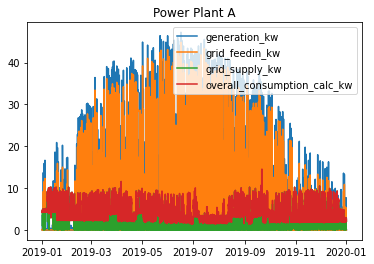

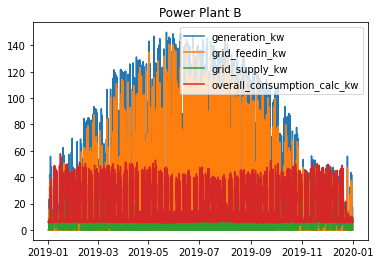

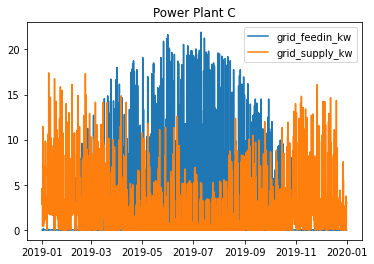

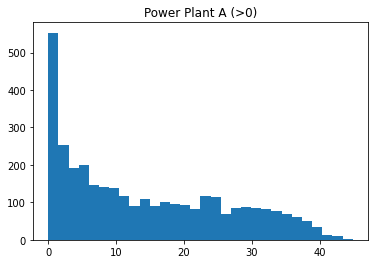

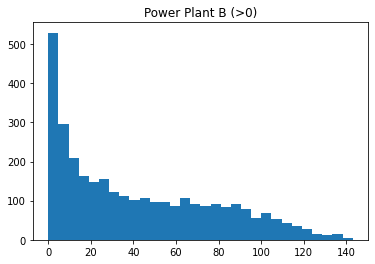

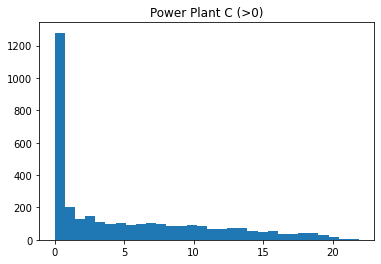

In [9]:
plt.plot(data_power_plant_a)
plt.title("Power Plant A")
plt.legend(data_power_plant_a.columns)
plt.show()

plt.plot(data_power_plant_b)
plt.title("Power Plant B")
plt.legend(data_power_plant_b.columns)
plt.show()

plt.plot(data_power_plant_c)
plt.title("Power Plant C")
plt.legend(data_power_plant_c.columns)
plt.show()

plt.hist(data_power_plant_a["grid_feedin_kw"]
    , bins = 30
    , range = (0.0001, max(data_power_plant_a["grid_feedin_kw"]))
    )
plt.title("Power Plant A (>0)")
plt.show()


plt.hist(data_power_plant_b["grid_feedin_kw"]
    , bins = 30
    , range = (0.0001, max(data_power_plant_b["grid_feedin_kw"]))
    )
plt.title("Power Plant B (>0)")
plt.show()

plt.hist(data_power_plant_c["grid_feedin_kw"]
    , bins = 30
    , range = (0.0001, max(data_power_plant_c["grid_feedin_kw"]))
    )
plt.title("Power Plant C (>0)")
plt.show()

## Pre Process Weather Data + Visualization
Findings:
- Wetterdaten fehlen für eine Stunde --> interpoliert

In [10]:
def weather_format_columns(df):
        columns_lower = df.columns.str.lower()
        columns_clean = columns_lower.str.replace("-", "")
        df.columns = columns_clean
        return df


def weather_set_datetime_index(df):
    """ create datetime index based on local_time,
    and resampled mean per hour"""
    df["timestamp"] = pd.to_datetime(df["local_time"])
    df.set_index(df["timestamp"], inplace=True)
    df = df.resample("h").mean()
    return df

In [11]:
data_weather = weather_format_columns(data_weather)
data_weather = weather_set_datetime_index(data_weather)

In [12]:
data_weather

,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover
timestamp,,,,,,,,
2019-01-01 01:00:00,-2.542,0.001,0.0,10.513,1.106,0.0,0.0,0.001
2019-01-01 02:00:00,-2.190,0.001,0.0,10.515,1.106,0.0,0.0,0.043
2019-01-01 03:00:00,-2.182,0.001,0.0,10.516,1.106,0.0,0.0,0.171
2019-01-01 04:00:00,-2.230,0.000,0.0,10.517,1.106,0.0,0.0,0.379
2019-01-01 05:00:00,-2.113,0.000,0.0,10.517,1.105,0.0,0.0,0.558
...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00,-1.808,0.000,0.0,199.626,1.095,0.0,0.0,0.566
2019-12-31 21:00:00,-1.897,0.000,0.0,199.627,1.096,0.0,0.0,0.320
2019-12-31 22:00:00,-1.513,0.000,0.0,199.628,1.095,0.0,0.0,0.455


Find Rows with missing Data

In [13]:
data_weather[data_weather.isnull().any(axis=1)]

,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover
timestamp,,,,,,,,
2019-03-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Look at the data of this day (Raw output) --> Only temperature has a value, which would not be correct, if we simply
take the average of the time before and after the missing values 

In [14]:
data_weather.loc['2019-03-31']

,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover
timestamp,,,,,,,,
2019-03-31 00:00:00,3.691,0.0,0.0,0.019,1.081,0.000,0.000,0.000
2019-03-31 01:00:00,3.410,0.0,0.0,0.019,1.081,0.000,0.000,0.000
2019-03-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31 03:00:00,3.149,0.0,0.0,0.019,1.081,0.000,0.000,0.000
2019-03-31 04:00:00,2.813,0.0,0.0,0.019,1.082,0.000,0.000,0.000
2019-03-31 05:00:00,2.288,0.0,0.0,0.019,1.083,0.000,0.000,0.000
2019-03-31 06:00:00,1.702,0.0,0.0,0.019,1.084,0.000,0.000,0.000
2019-03-31 07:00:00,1.534,0.0,0.0,0.019,1.084,42.887,81.868,0.000
2019-03-31 08:00:00,3.908,0.0,0.0,0.019,1.084,219.470,321.597,0.000


Interpolate missing data

In [15]:
data_weather_clean = data_weather.interpolate()

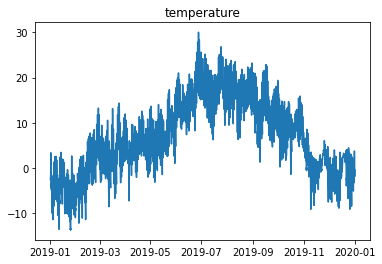

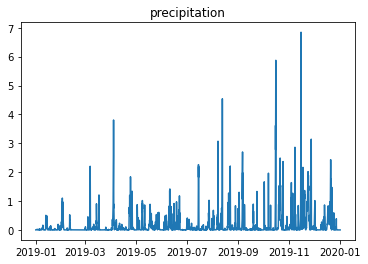

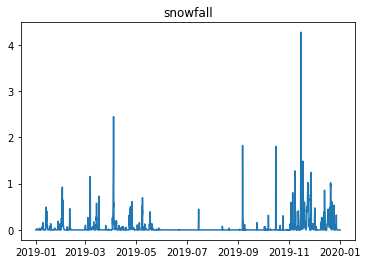

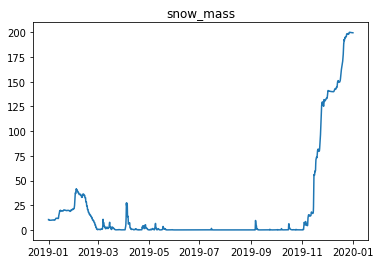

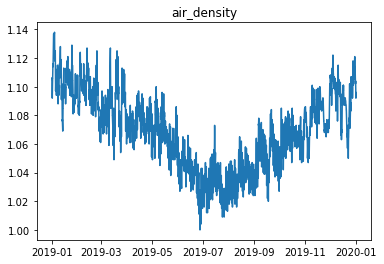

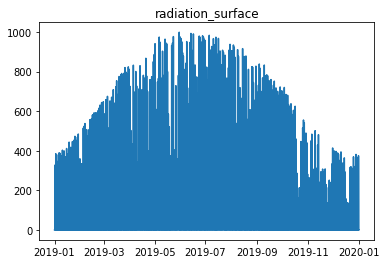

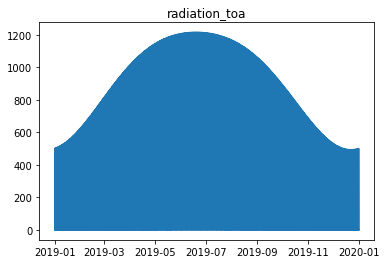

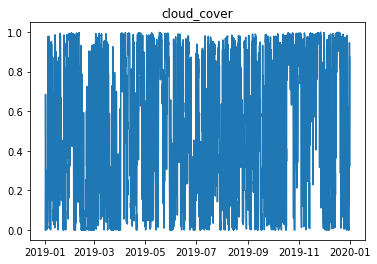

In [16]:
data_weather_clean = data_weather.interpolate()

plt.plot(data_weather_clean["temperature"])
plt.title("temperature")
plt.show()

plt.plot(data_weather_clean["precipitation"])
plt.title("precipitation")
plt.show()

plt.plot(data_weather_clean["snowfall"])
plt.title("snowfall")
plt.show()

plt.plot(data_weather_clean["snow_mass"])
plt.title("snow_mass")
plt.show()

plt.plot(data_weather_clean["air_density"])
plt.title("air_density")
plt.show()

plt.plot(data_weather_clean["radiation_surface"])
plt.title("radiation_surface")
plt.show()

plt.plot(data_weather_clean["radiation_toa"])
plt.title("radiation_toa")
plt.show()

plt.plot(data_weather_clean["cloud_cover"])
plt.title("cloud_cover")
plt.show()


In [17]:
data_weather_enhanced = data_weather_clean.copy()
data_weather_enhanced['month'] = data_weather_enhanced.index.month
data_weather_enhanced['day'] = data_weather_enhanced.index.day
data_weather_enhanced['hour'] = data_weather_enhanced.index.hour

## Prepare Data for a simple Linear Regression
To Do:
- Daten der Power Plants mit den Wetterdaten verbinden
- Daten pro Power Plant in Test und Validation Set splitten
- Simples Regressionsmodell erstellen
- Regressionsmodell testen
- Sobald das Regressionsmodell genügt -> Output predicten und neues DF generieren (actual output, Works properly)

#### Merge Power Plant and Weather Data

In [18]:
# Inner Join weil es keine Wetterdaten für 1.1.2019 00:00 Uhr gibt
df_a = data_power_plant_a.copy().join(data_weather_enhanced, how='inner')
df_b = data_power_plant_b.copy().join(data_weather_enhanced, how='inner')
df_c = data_power_plant_c.copy().join(data_weather_enhanced, how='inner')

#### split data

In [19]:
df_a_train, df_a_test = train_test_split(df_a, test_size=0.2, random_state=123)
df_b_train, df_b_test = train_test_split(df_b, test_size=0.2, random_state=123)
df_c_train, df_c_test = train_test_split(df_c, test_size=0.2, random_state=123)

In [20]:
print(len(df_a))
print(len(df_a_train))
print(len(df_a_test))
print('-'*20)
print(len(df_b))
print(len(df_b_train))
print(len(df_b_test))
print('-'*20)
print(len(df_c))
print(len(df_c_train))
print(len(df_c_test))

8759
7007
1752
--------------------
8759
7007
1752
--------------------
8759
7007
1752


#### Create Linear Regression Model

Create a simple Regression Model with all possible input data

In [21]:
X_train = df_a_train[["temperature", "precipitation", "snowfall", "snow_mass", "air_density", "radiation_surface", "radiation_toa", "cloud_cover", "month", "day", "hour"]]
y_train = df_a_train["grid_feedin_kw"]

X_test = df_a_test[["temperature", "precipitation", "snowfall", "snow_mass", "air_density", "radiation_surface", "radiation_toa", "cloud_cover", "month", "day", "hour"]]
y_test = df_a_test["grid_feedin_kw"]

regressor_OLS=sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         grid_feedin_kw   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              2673.
Date:                Wed, 27 May 2020   Prob (F-statistic):                        0.00
Time:                        12:44:35   Log-Likelihood:                         -21273.
No. Observations:                7007   AIC:                                  4.257e+04
Df Residuals:                    6996   BIC:                                  4.264e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
temperature           0.1460      0.012     12.241      0.000       0.123       0.169
precipitation        -0.2647      0.264     -1.004      0.316      -0.782       0.252
snowfall              0.4700      0.556      0.845      0.398      -0.621       1.561
snow_mass             0.0032      0.002      1.667      0.096      -0.001       0.007
air_density          -1.2858      0.206     -6.236      0.000      -1.690      -0.882
radiation_surface     0.0271      0.001     34.924      0.000       0.026       0.029
radiation_toa         0.0034      0.000      6.790      0.000       0.002       0.004
cloud_cover           0.2650      0.193      1.372      0.170      -0.114       0.644
month                -0.1167      0.026     -4.550      0.000      -0.167      -0.066
day                   0.0287      0.007      4.022      0.000       0.015       0.043
hour                  0.0113      0.009      1.264      0.206      -0.006       0.029
==============================================================================
Omnibus:                      788.279   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4310.786
Skew:                          -0.402   Prob(JB):                         0.00
Kurtosis:                       6.757   Cond. No.                     5.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print("The model degree of freedom: ",regressor_OLS.df_model)
print("The residual degree of freedom: ", sum(regressor_OLS.resid)/len(regressor_OLS.resid))
print("-"*20, "\n")

y_predict_ols = regressor_OLS.predict(X_test)
print("Average predicted grid_feedin_kw: ", sum(y_predict_ols)/ len(y_predict_ols))
print("Average actual grid_feedin_kw: ", sum(y_test)/ len(y_test))
print("Difference in prediction: ", (sum(y_predict_ols)/ len(y_predict_ols)) / (sum(y_test)/ len(y_test)))


The model degree of freedom:  11.0
The residual degree of freedom:  0.00018410620581589147
-------------------- 

Average predicted grid_feedin_kw:  5.347860250611294
Average actual grid_feedin_kw:  5.336903538812784
Difference in prediction:  1.0020530091501236


Make a Prediction for the whole dataset and create a new pandas dataframe with only the acutal value and the predicted value

In [23]:
df_predict_actual = pd.DataFrame(df_a.copy()["grid_feedin_kw"])
df_predict_actual["prediction"] = regressor_OLS.predict(df_a[["temperature", "precipitation", "snowfall", "snow_mass", "air_density", "radiation_surface", "radiation_toa", "cloud_cover", "month", "day", "hour"]])

Make all prediction below 0 to 0 (as there can't be any value below 0)

In [24]:
df_predict_actual["prediction"] = df_predict_actual["prediction"].apply(lambda x: 0 if x <= 0 else x)


Plot the data

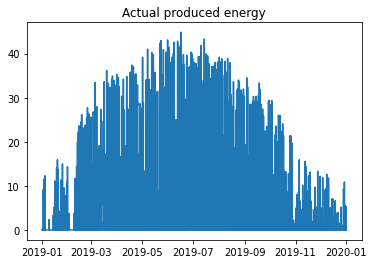

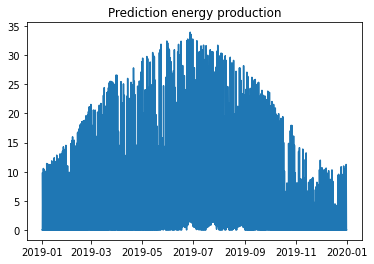

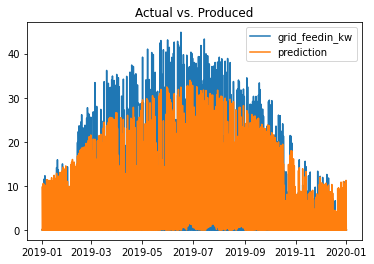

In [25]:
plt.plot(df_predict_actual["grid_feedin_kw"])
plt.title("Actual produced energy")
plt.show()
plt.plot(df_predict_actual["prediction"])
plt.title("Prediction energy production")
plt.show()
plt.plot(df_predict_actual)
plt.legend(df_predict_actual.columns)
plt.title("Actual vs. Produced")
plt.show()

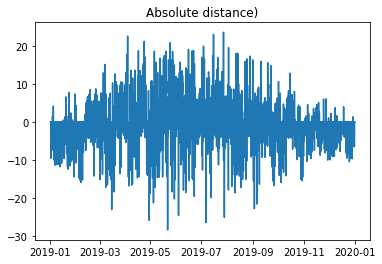

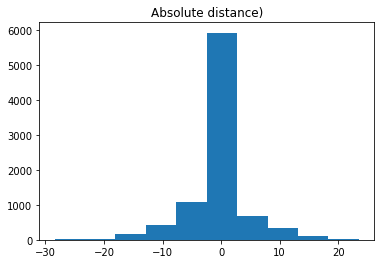

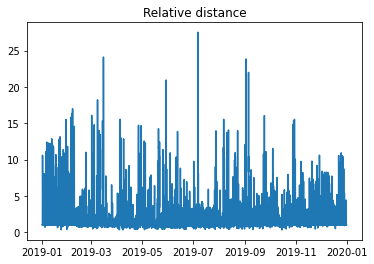

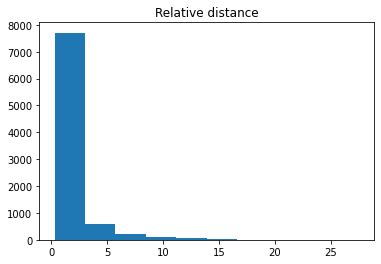

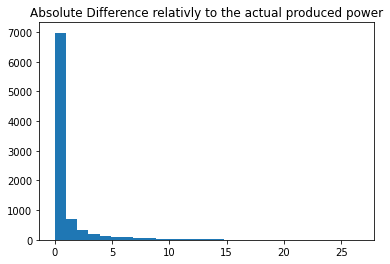

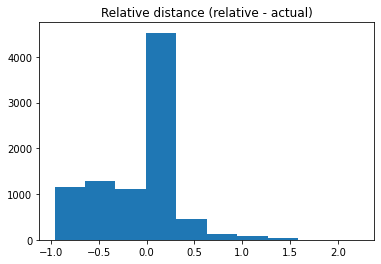

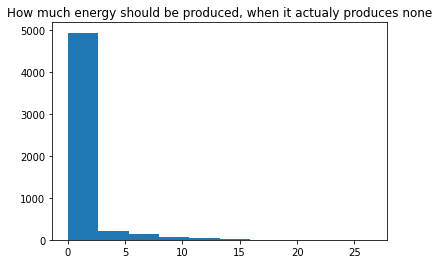

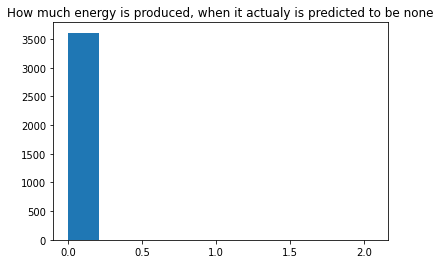

In [26]:
plt.plot( df_predict_actual["grid_feedin_kw"]- df_predict_actual["prediction"])
plt.title("Absolute distance)")
plt.show()

plt.hist(df_predict_actual["grid_feedin_kw"]- df_predict_actual["prediction"])
plt.title("Absolute distance)")
plt.show()

# relativer Unterschied (lambda, weil division durch 0 nicht geht)
plt.plot(
    df_predict_actual["prediction"].apply(lambda x: x+1)
    / df_predict_actual["grid_feedin_kw"].apply(lambda x: x+1)
)
plt.title("Relative distance")
plt.show()

plt.hist(
    df_predict_actual["prediction"].apply(lambda x: x+1)
    / df_predict_actual["grid_feedin_kw"].apply(lambda x: x+1)
)
plt.title("Relative distance")
plt.show()

plt.hist(
    (df_predict_actual["grid_feedin_kw"]- df_predict_actual["prediction"]).abs()
    / df_predict_actual["grid_feedin_kw"].apply(lambda x: x+1)
    , bins = 27
)
plt.title("Absolute Difference relativly to the actual produced power")
plt.show()

plt.hist(
    (df_predict_actual["grid_feedin_kw"]- df_predict_actual["prediction"])
    / df_predict_actual["prediction"].apply(lambda x: x+1)
)
plt.title("Relative distance (relative - actual)")
plt.show()


plt.hist(
    df_predict_actual["prediction"].loc[df_predict_actual["grid_feedin_kw"] == 0]
)
plt.title("How much energy should be produced, when it actualy produces none")
plt.show()

plt.hist(
    df_predict_actual["grid_feedin_kw"].loc[df_predict_actual["prediction"] == 0]
)
plt.title("How much energy is produced, when it actualy is predicted to be none")
plt.show()


Bei den obrigen Grafiken ist ersichtlich, dass es schwierig ist ein Verhältnis zu finden, bei dem der produzierte Wert stark vom prognostizierten abweicht 
und so ein Fehler vorliegen muss. Aber es zeigt sich, dass es vorkommt, dass die PV nichts produziert, obwohl es laut prediction etwas produzieren sollte. 
Umgekehrt wird nichts produziert, wenn die Prognose auch sagt, dass nichts produziert werden sollte. 

-> Daher werden die Werte als not working gelabeled, bei denen nichts produziert wird, obwohl das MOdell sagt, dass etwas produziert werden sollte.

## New markdown cell

In [27]:
#df_predict_actual.drop('label_machine_working', axis=1, inplace=True)
df_predict_actual['label_machine_working'] = df_predict_actual["prediction"].loc[df_predict_actual["grid_feedin_kw"] == 0].apply(lambda x: x <= 1)
df_predict_actual['label_machine_working'].fillna(value=True, inplace=True)


In [28]:
df_predict_actual

,grid_feedin_kw,prediction,label_machine_working
timestamp,,,
2019-01-01 01:00:00,0.0,0.0,True
2019-01-01 02:00:00,0.0,0.0,True
2019-01-01 03:00:00,0.0,0.0,True
2019-01-01 04:00:00,0.0,0.0,True
2019-01-01 05:00:00,0.0,0.0,True
...,...,...,...
2019-12-31 19:00:00,0.0,0.0,True
2019-12-31 20:00:00,0.0,0.0,True
2019-12-31 21:00:00,0.0,0.0,True


In [29]:
print("True values: ", len(df_predict_actual.loc[df_predict_actual['label_machine_working'] == True]))
print("False values: ", len(df_predict_actual.loc[df_predict_actual['label_machine_working'] == False]))
print("Ratio: ", len(df_predict_actual.loc[df_predict_actual['label_machine_working'] == False]) / len(df_predict_actual))

True values:  7853
False values:  906
Ratio:  0.10343646534992579


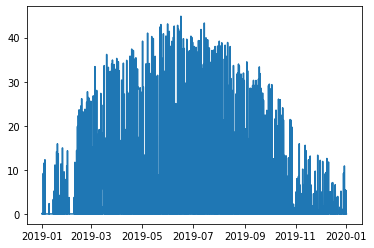

In [30]:
plt.plot(df_predict_actual["grid_feedin_kw"]
    , label=df_predict_actual["label_machine_working"]
)

In [31]:
# only regard a certain number of consecutive failures as "real" failures

consecutive_failure_threshold = 6

df_predict_actual["cumulative_consecutive_count_for_machine_working_label"] = (df_predict_actual.groupby(
    (df_predict_actual['label_machine_working'] != df_predict_actual['label_machine_working'].shift()).cumsum())
                                    .cumcount())

# show "real" failures
df_predict_actual.query('label_machine_working == False & cumulative_consecutive_count_for_machine_working_label > @consecutive_failure_threshold')

,grid_feedin_kw,prediction,label_machine_working,cumulative_consecutive_count_for_machine_working_label
timestamp,,,,
2019-01-29 15:00:00,0.0,6.583344,False,7
2019-01-29 16:00:00,0.0,1.538708,False,8
2019-02-04 15:00:00,0.0,7.134766,False,7
2019-02-04 16:00:00,0.0,1.978749,False,8
2019-02-05 15:00:00,0.0,7.647740,False,7
2019-02-05 16:00:00,0.0,2.461614,False,8
2019-02-06 15:00:00,0.0,8.026217,False,7
2019-02-06 16:00:00,0.0,2.758966,False,8
2019-03-15 14:00:00,0.0,19.425051,False,7
